In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Loading DATA Sets

In [2]:
fake = pd.read_csv("C:/Users/JYOTHISH/Downloads/Fake.csv/Fake.csv")
true = pd.read_csv("C:/Users/JYOTHISH/Downloads/True.csv/True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
#DATA CLEANING and PREPARATION


#Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [8]:
#Concatenate dataframes
data = pd.concat([fake,true]).reset_index(drop = True)
data.shape

(44898, 5)

In [9]:
#shuffle the data

from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True) #shuffle the data and reset index by dropping previous and assigning new asper order.
# data = data.reset_index(drop=True)

In [10]:
#Check the Data
data.head()

,title,text,subject,date,target
0,Illinois House Democrats push tax freeze to en...,CHICAGO (Reuters) - Democrats in Illinois’ Hou...,politicsNews,"June 26, 2017",true
1,House Republican leader says 'easier' if Sessi...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"March 2, 2017",true
2,WATCH WHAT HAPPENS WHEN CHRISTIAN MAN ASKS 13 ...,I was wondering if I could get a cake that sa...,left-news,"Apr 7, 2015",fake
3,Russia's air force killed 850 militants in Syr...,MOSCOW (Reuters) - Russia s air force has kill...,worldnews,"September 20, 2017",true
4,WOW! Huckabee Asks Nancy Pelosi If She’s “Raci...,Our country deserves a HUD Secretary with the ...,left-news,"Dec 5, 2016",fake


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [12]:
#Removing the Date

data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Illinois House Democrats push tax freeze to en...,CHICAGO (Reuters) - Democrats in Illinois’ Hou...,politicsNews,true
1,House Republican leader says 'easier' if Sessi...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,true
2,WATCH WHAT HAPPENS WHEN CHRISTIAN MAN ASKS 13 ...,I was wondering if I could get a cake that sa...,left-news,fake
3,Russia's air force killed 850 militants in Syr...,MOSCOW (Reuters) - Russia s air force has kill...,worldnews,true
4,WOW! Huckabee Asks Nancy Pelosi If She’s “Raci...,Our country deserves a HUD Secretary with the ...,left-news,fake


In [13]:
#Removing the title

data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,CHICAGO (Reuters) - Democrats in Illinois’ Hou...,politicsNews,true
1,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,true
2,I was wondering if I could get a cake that sa...,left-news,fake
3,MOSCOW (Reuters) - Russia s air force has kill...,worldnews,true
4,Our country deserves a HUD Secretary with the ...,left-news,fake


In [14]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,chicago (reuters) - democrats in illinois’ hou...,politicsNews,true
1,washington (reuters) - u.s. house of represent...,politicsNews,true
2,i was wondering if i could get a cake that sa...,left-news,fake
3,moscow (reuters) - russia s air force has kill...,worldnews,true
4,our country deserves a hud secretary with the ...,left-news,fake


In [15]:
# Remove the Punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [16]:
# Check

data.head()

,text,subject,target
0,chicago reuters democrats in illinois’ house ...,politicsNews,true
1,washington reuters us house of representative...,politicsNews,true
2,i was wondering if i could get a cake that sa...,left-news,fake
3,moscow reuters russia s air force has killed ...,worldnews,true
4,our country deserves a hud secretary with the ...,left-news,fake


In [17]:
# Removing STOPWORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JYOTHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data.head()

,text,subject,target
0,chicago reuters democrats illinois’ house repr...,politicsNews,true
1,washington reuters us house representatives ma...,politicsNews,true
2,wondering could get cake says gay marriage wro...,left-news,fake
3,moscow reuters russia air force killed 850 mil...,worldnews,true
4,country deserves hud secretary relevant experi...,left-news,fake


# Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


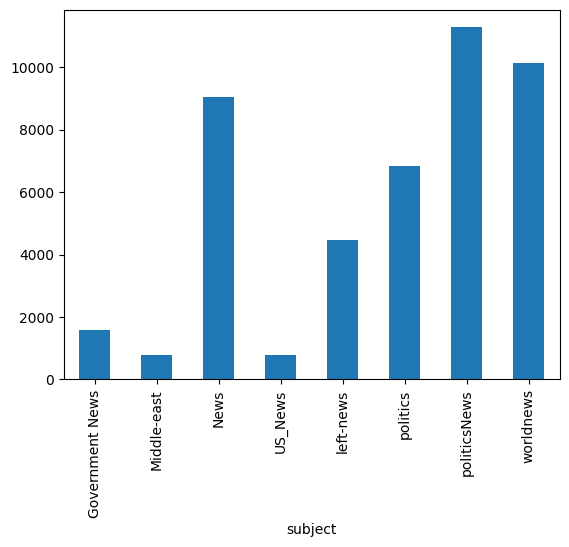

In [19]:
#How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


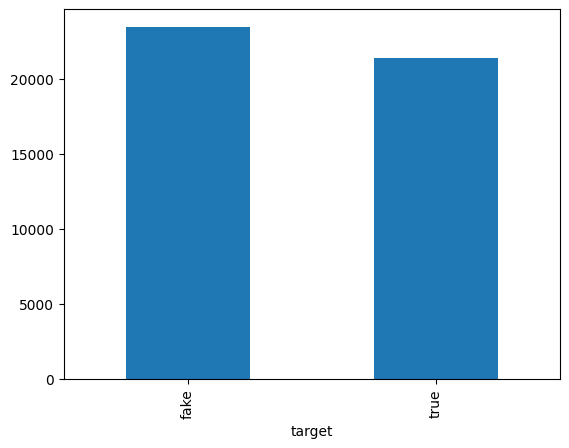

In [20]:
# How many fake and real articles?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()


In [21]:
!pip install wordcloud

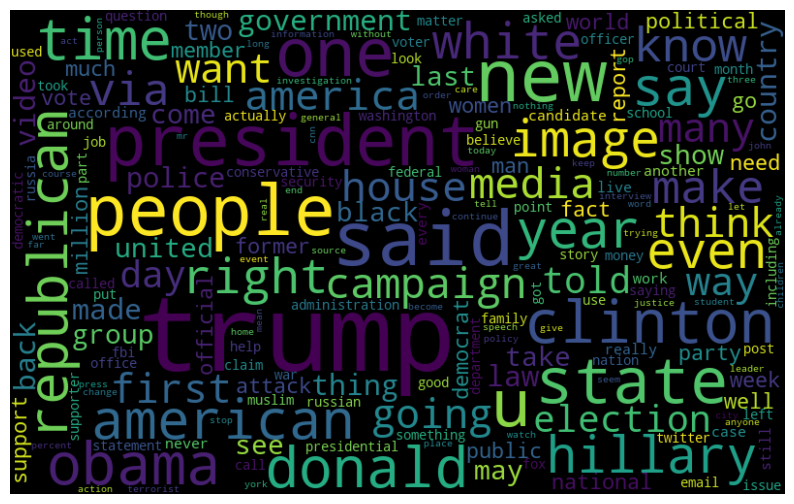

In [22]:
# Word Cloud for Fake News

from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800,height= 500,max_font_size = 110,
                        collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

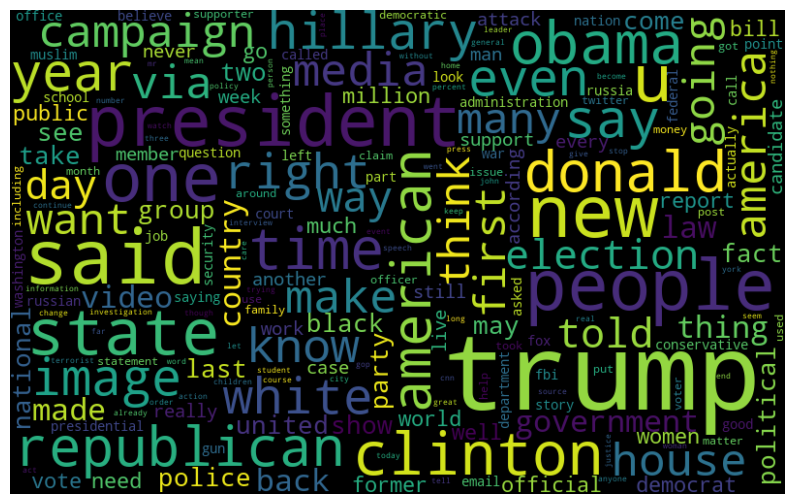

In [23]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# Most frequent words counter 

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

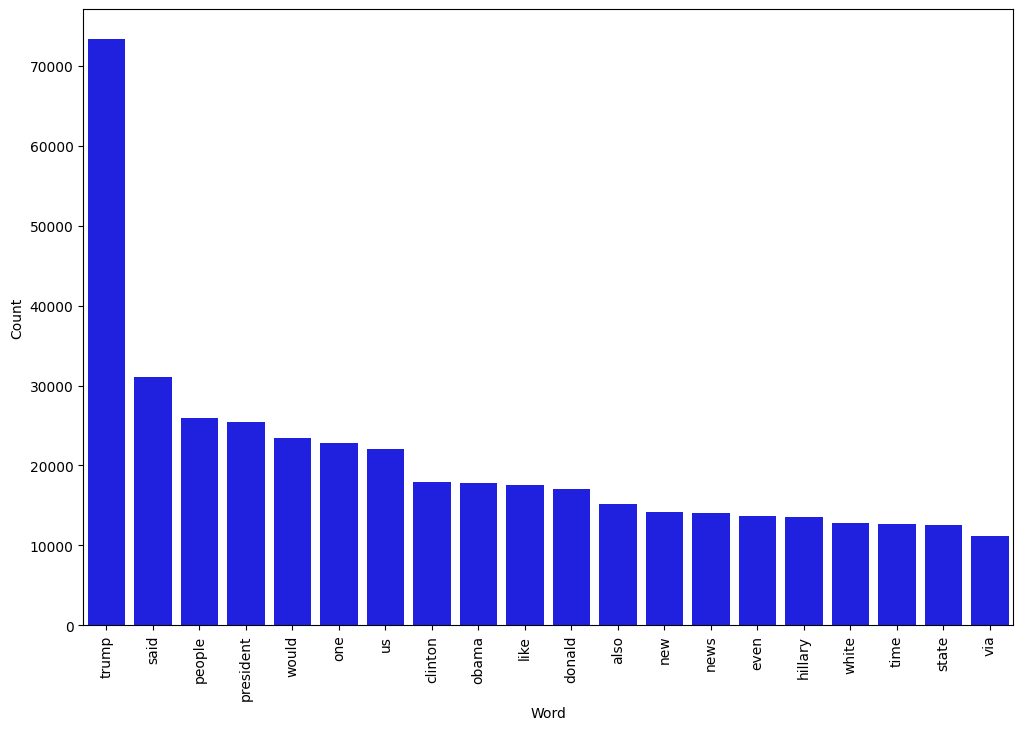

In [25]:
# Most frequent words in fake news

counter(data[data["target"] == "fake"], "text", 20)

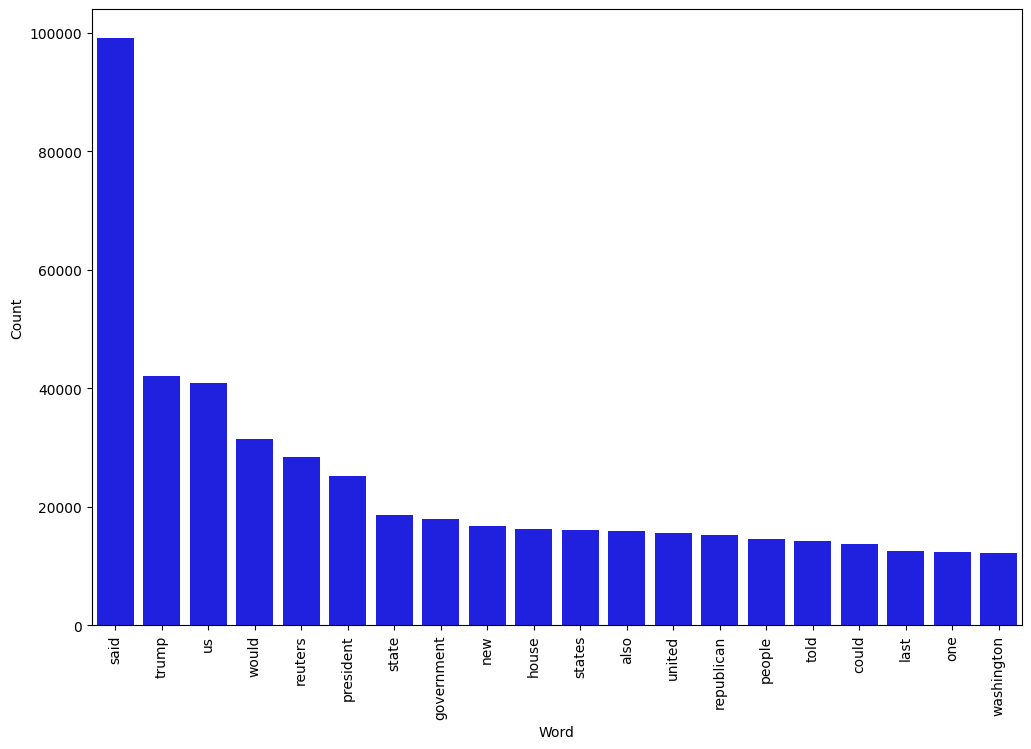

In [26]:
# Most frequent words in real news

counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [27]:
# Function to plot the confusion matrix

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Split Data

In [28]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


In [29]:
X_train.head()

36335    washington reuters chairman senate foreign rel...
12384    lima reuters fujimori clan nearly two decades ...
24419    tune alternate current radio network acr anoth...
24740    donald trump shocked world 10minute phone call...
27039    new york reuters former manhattan us attorney ...
Name: text, dtype: object

In [30]:
y_train.head()

36335    true
12384    true
24419    fake
24740    fake
27039    true
Name: target, dtype: object

 # Naive Bayes ML Algorithm

In [31]:
from sklearn.naive_bayes import MultinomialNB

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: {}%".format(round(accuracy * 100, 2)))

# Precision
precision = precision_score(y_test, prediction, average='weighted')
print("Precision: {}%".format(round(precision * 100, 2)))

# Recall
recall = recall_score(y_test, prediction, average='weighted')
print("Recall: {}%".format(round(recall * 100, 2)))

# F1 Score
f1 = f1_score(y_test, prediction, average='weighted')
print("F1 Score: {}%".format(round(f1 * 100, 2)))

Accuracy: 95.24%
Precision: 95.28%
Recall: 95.24%
F1 Score: 95.25%


# Confusion Matrix

Confusion matrix, without normalization


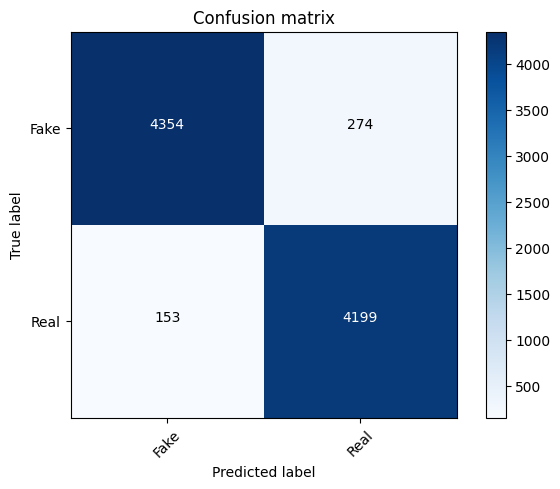

In [32]:
# Plot Confusion Matrix

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])